In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Read the data from file
df = pd.read_csv("WeatherData.csv")
print(df.shape[1])

17


In [3]:
# Filter the data from year 2010
df = df.iloc[331371:]

In [4]:
# Reset Index of the dataframe
df.reset_index(inplace=True)

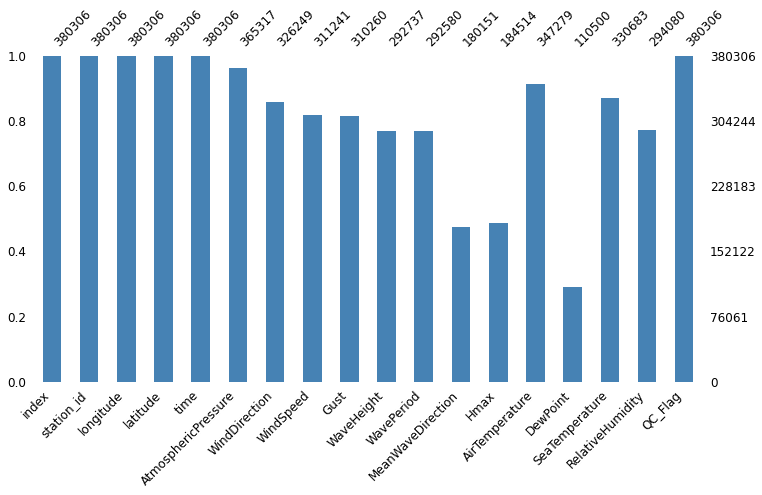

In [5]:
# Visualize the missing data
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()

In [6]:
# Calculate and display missing data percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                             column_name  percent_missing
index                              index         0.000000
station_id                    station_id         0.000000
longitude                      longitude         0.000000
latitude                        latitude         0.000000
time                                time         0.000000
AtmosphericPressure  AtmosphericPressure         3.941300
WindDirection              WindDirection        14.214080
WindSpeed                      WindSpeed        18.160376
Gust                                Gust        18.418326
WaveHeight                    WaveHeight        23.025932
WavePeriod                    WavePeriod        23.067214
MeanWaveDirection      MeanWaveDirection        52.629987
Hmax                                Hmax        51.482753
AirTemperature            AirTemperature         8.684323
DewPoint                        DewPoint        70.944450
SeaTemperature            SeaTemperature        13.048177
RelativeHumidi

In [7]:
# Drop the columns which are not required or which have missing data more than 50 per cent
df.drop(columns=["index","DewPoint","longitude","latitude","MeanWaveDirection","Hmax","QC_Flag"],inplace = True)

In [8]:
#  Filter the data only for 5 buouys
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]

In [9]:
# Drop the rows which have missing Atmospheric Pressure value as missing data for Atmospheric Pressure is less than 5 per cent
df.dropna(subset=["AtmosphericPressure"],inplace = True) 

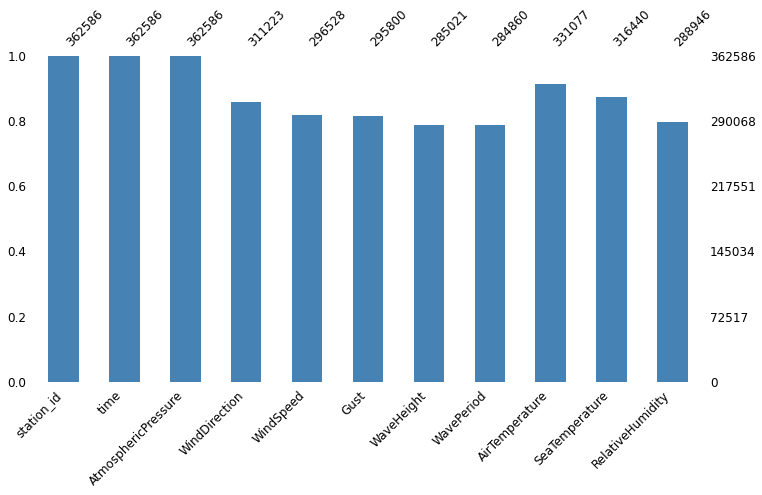

(362586, 11)


In [12]:
# Visualize the missing data again
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()
print(df.shape)

In [11]:
X=df.copy()
X.drop(columns=["time","station_id"],inplace = True)
print(X.shape)

(362586, 9)


In [32]:
import time
start_time = time.time()

In [33]:
# # Using Simple Imputer with strategy "Mean" or "Most Frequent"
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(X)
# X_trans=imp_mean.transform(X)

In [34]:
# Using Iterative Imputer impute the missing data in all columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(imputation_order='ascending')
imp.fit(X)
X_trans=imp.transform(X)

/Users/aishwaryaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [35]:
print(X_trans)
end_time = time.time() - start_time
print(end_time)

[[1015.8          20.           18.         ...    7.
    11.4          65.        ]
 [1006.2         195.8394167    16.95998618 ...    5.3
    10.6          78.        ]
 [1011.2          10.           12.         ...    4.7
    10.2          78.        ]
 ...
 [1013.733       133.           15.256      ...   13.438
    12.773        92.285     ]
 [1010.205       155.           13.206      ...   12.559
    11.548        91.992     ]
 [1007.996       130.           13.206      ...   12.754
    12.376        97.168     ]]
11.569448232650757


In [36]:
# Copy the imputed data in data frames and save in csv file
df_new = pd.DataFrame(X_trans, columns = ['AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','SeaTemperature','RelativeHumidity'])
df_final=pd.DataFrame()
df_final['station_id'] = df['station_id'].values
df_final = df_final.join(df_new)
print(df_final)
df_final.to_csv(r'ProcessedWeatherData.csv', index = False, header=True)

       station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0              M6             1015.800      20.000000  18.000000  33.000000   
1              M5             1006.200     195.839417  16.959986  24.214069   
2              M4             1011.200      10.000000  12.000000  20.000000   
3              M3             1009.400      30.000000  17.000000  25.000000   
4              M3             1009.000      20.000000  18.000000  25.000000   
...           ...                  ...            ...        ...        ...   
362581         M2             1015.088     165.000000  10.673000  13.092000   
362582         M6             1005.794     238.000000   2.505000   4.895000   
362583         M5             1013.733     133.000000  15.256000  18.102000   
362584         M4             1010.205     155.000000  13.206000  17.305000   
362585         M3             1007.996     130.000000  13.206000  17.191000   

        WaveHeight  WavePeriod  AirTemperature  Sea

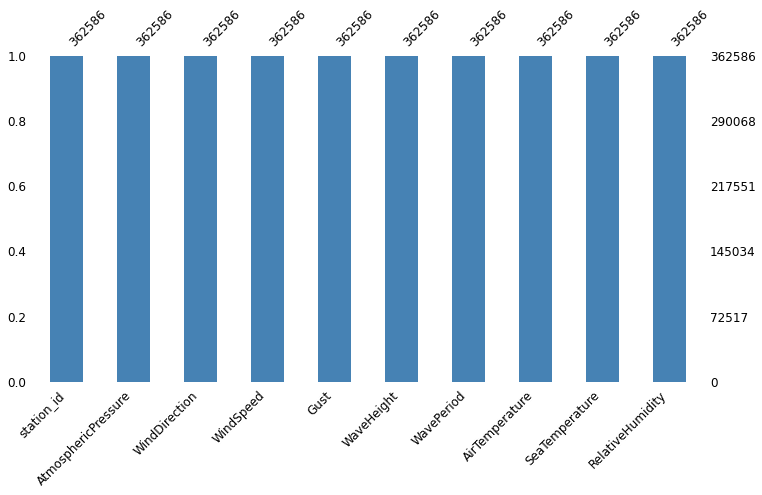

In [37]:
# after Imputation again visualize the missing data
msno.bar(df_final,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()